In [ ]:
# 1. Installing the Required Libraries

!pip install numpy==1.24.3 scikit-surprise
!pip install --no-cache-dir --force-reinstall scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 90.7 MB/s eta 0:00:00
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505203 sha256=958ce6ad760115de3a88c674ed1431eb62d56c3fd3dfb81940d7f383e6c5f7fe
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you h

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 131.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 184.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 228.8 MB/s eta 0:00:00


In [16]:
# 2. Import Required Libraries

import numpy as np
import pandas as pd
from math import sqrt
import time
import os
import psutil
import tracemalloc

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Surprise Library for Recommender Systems
from surprise import Dataset, Reader, SVD, KNNBasic, NMF
from surprise.model_selection import cross_validate, train_test_split

# Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prettify plots
sns.set(style="whitegrid")

In [7]:
# 3. Loading the dataset

names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv("./Dataset/ml-100k/u.data", sep='\t', names=names)

In [14]:
# 4. Preprocessing the dataset

df.dropna(inplace=True)
reader = Reader(rating_scale=(1, 5))  # Define the rating scale
data = Dataset.load_from_df(df[['user_id', 'item_id', 'rating']], reader)

In [10]:
# 5. Defining the models

models = {
    "SVD": SVD(),
    "KNN": KNNBasic(),
    "NMF": NMF()
}

In [12]:
# 6. List to store the results

results = []

In [17]:
# 7. Evaluating the models

for name, algo in models.items():

    print(f"Training {name}...")

    tracemalloc.start() # To track thhe used memory and time
    start = time.time()

    # Cross-validate with 5-fold
    cv_results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

    end = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    # Store the formated result

    results.append({
        'Model': name,
        'Avg Fit Time (s)': round(np.mean(cv_results['fit_time']), 4),
        'Avg Memory (KB)': round(peak / 1024, 2),
        'Avg RMSE': round(np.mean(cv_results['test_rmse']), 4),
        'Avg MAE': round(np.mean(cv_results['test_mae']), 4)
    })

Training SVD...
Training KNN...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Training NMF...


In [18]:
# Creating dataframe from results

results_df = pd.DataFrame(results)
print("\nEvaluation Summary:")
print(results_df)


Evaluation Summary:
  Model  Avg Fit Time (s)  Avg Memory (KB)  Avg RMSE  Avg MAE
0   SVD            2.5738         27708.06    0.9364   0.7382
1   KNN            0.6628         41719.05    0.9783   0.7726
2   NMF            6.4952         25961.37    0.9631   0.7569


<ipython-input-19-42e1b2ec66b1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='Set2')
<ipython-input-19-42e1b2ec66b1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='Set2')
<ipython-input-19-42e1b2ec66b1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='Set2')
<ipython-input-19-42e1b2ec66b1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. As

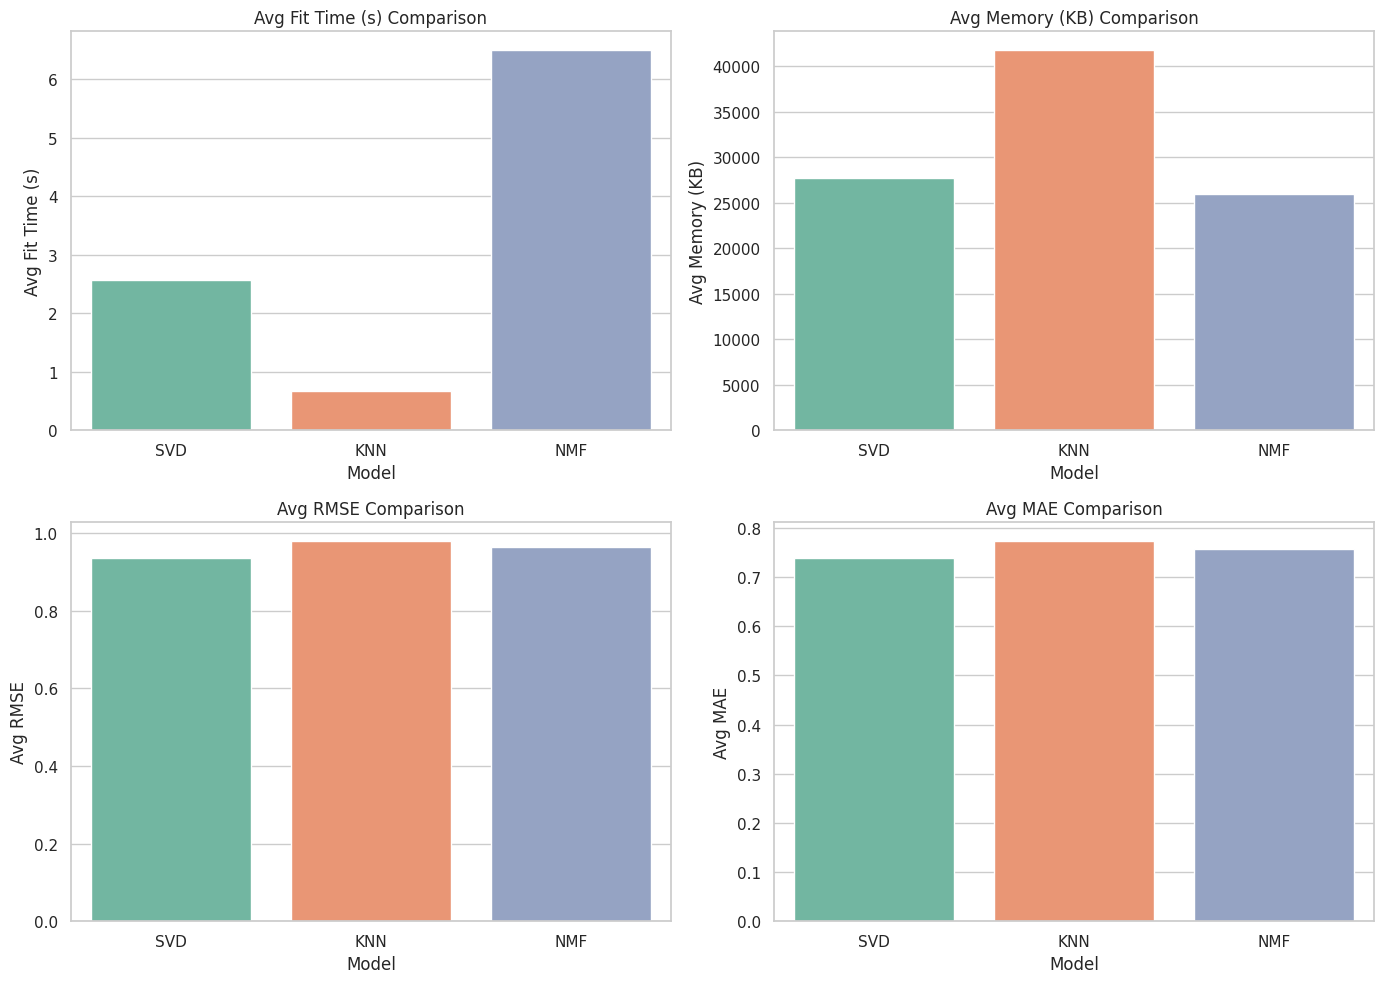

In [19]:
# Plotting the result

metrics = ['Avg Fit Time (s)', 'Avg Memory (KB)', 'Avg RMSE', 'Avg MAE']

plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    sns.barplot(x='Model', y=metric, data=results_df, palette='Set2')
    plt.title(f'{metric} Comparison')
    plt.ylabel(metric)
    plt.xlabel("Model")

plt.tight_layout()
plt.show()

In [27]:
# Get a list of all movie IDs
movie_ids = df['item_id'].unique()

# Function to predict ratings and get movie titles
def predict_ratings_with_titles(user_id):
    predictions = []
    for movie_id in movie_ids:
        pred = algo.predict(user_id, movie_id)
        predictions.append((movie_id, pred.est))

    # Create a DataFrame from predictions
    preds_df = pd.DataFrame(predictions, columns=['movie_id', 'Predicted Rating'])

    # Merge with movie titles
    preds_df = pd.merge(preds_df, movies_df, on='movie_id')

    return preds_df

Top 10 movie recommendations for user 1:


,movie_id,movie_title,Predicted Rating
1428,1512,"World of Apu, The (Apur Sansar) (1959)",5.000000
1239,1367,Faust (1994),5.000000
1513,851,Two or Three Things I Know About Her (1966),5.000000
1571,1642,Some Mother's Son (1996),5.000000
1271,1524,Kaspar Hauser (1993),5.000000
1608,1643,Angel Baby (1995),4.942329
1647,1201,Marlene Dietrich: Shadow and Light (1996),4.924653
277,169,"Wrong Trousers, The (1993)",4.888815
541,513,"Third Man, The (1949)",4.866707
180,408,"Close Shave, A (1995)",4.865740


In [28]:
# Example usage: predict ratings for user 1
user_id = 1
predicted_ratings_with_titles = predict_ratings_with_titles(user_id)

# Sort by predicted rating and get top 10
top_10_recommendations = predicted_ratings_with_titles.sort_values(by=['Predicted Rating'], ascending=False).head(10)

# Display the top 10 recommendations with movie ID, title, and rating
print(f"Top 10 movie recommendations for user {user_id}:")
top_10_recommendations[['movie_id', 'movie_title', 'Predicted Rating']]

Top 10 movie recommendations for user 1:


,movie_id,movie_title,Predicted Rating
1428,1512,"World of Apu, The (Apur Sansar) (1959)",5.000000
1239,1367,Faust (1994),5.000000
1513,851,Two or Three Things I Know About Her (1966),5.000000
1571,1642,Some Mother's Son (1996),5.000000
1271,1524,Kaspar Hauser (1993),5.000000
1608,1643,Angel Baby (1995),4.942329
1647,1201,Marlene Dietrich: Shadow and Light (1996),4.924653
277,169,"Wrong Trousers, The (1993)",4.888815
541,513,"Third Man, The (1949)",4.866707
180,408,"Close Shave, A (1995)",4.865740
